In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
#1. Inspect the data table. Look for columns of interest and decide that stats to run for what reasons

In [6]:
crime = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
crime.head()
len(crime.columns)

28

In [7]:
crime.rename(columns={'Date Rptd': 'Date_Reported',
                      'DATE OCC': 'Date_Occurred',
                      'TIME OCC': 'Time_Occurred',
                      'AREA':'Area',
                      'AREA NAME': 'Area_Name',
                      'Rpt Dist No': 'Report_Distruct_Number',
                      'Crm Cd': 'Crime_Code',
                      'Crm Cd Desc': 'Crime_Code_Desc',
                      'Premis Cd' : 'Premis_Code' ,
                      'Premis Desc': 'Premis_Desc',
                      'Weapon Used Cd': 'Weapon_Used_Code',
                      'Weapon Desc' : 'Weason_Desc',
                      'Status Desc': 'Status_Desc',
                      'Crm Cd 1': 'Crime_Code_1',
                      'Crm Cd 2': 'Crime_Code_2',
                      'Crm Cd 3': "Crime_Code_3",
                      'Crm Cd 4': "Crime_Code_4",
                      'Cross Street':'Cross_Street',
                      'LOCATION': 'Location'}, inplace=True)
crime.head()

,DR_NO,Date_Reported,Date_Occurred,Time_Occurred,Area,Area_Name,Report_Distruct_Number,Part 1-2,Crime_Code,Crime_Code_Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis_Code,Premis_Desc,Weapon_Used_Code,Weason_Desc,Status,Status_Desc,Crime_Code_1,Crime_Code_2,Crime_Code_3,Crime_Code_4,Location,Cross_Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [8]:
crime.rename(columns={'Vict Age': 'Victim_Age',
                      'Vict Sex': 'Victim_Sex',
                      'Vict Descent': 'Victim_Descent'}, inplace=True)


In [9]:
crime.rename(columns={'Weason_Desc': 'Weapon_Desc'}, inplace=True)

crime.columns

Index(['DR_NO', 'Date_Reported', 'Date_Occurred', 'Time_Occurred', 'Area',
       'Area_Name', 'Report_Distruct_Number', 'Part 1-2', 'Crime_Code',
       'Crime_Code_Desc', 'Mocodes', 'Victim_Age', 'Victim_Sex',
       'Victim_Descent', 'Premis_Code', 'Premis_Desc', 'Weapon_Used_Code',
       'Weapon_Desc', 'Status', 'Status_Desc', 'Crime_Code_1', 'Crime_Code_2',
       'Crime_Code_3', 'Crime_Code_4', 'Location', 'Cross_Street', 'LAT',
       'LON'],
      dtype='object')

In [10]:
crime.describe()

,DR_NO,Time_Occurred,Area,Report_Distruct_Number,Part 1-2,Crime_Code,Victim_Age,Premis_Code,Weapon_Used_Code,Crime_Code_1,Crime_Code_2,Crime_Code_3,Crime_Code_4,LAT,LON
count,9.840450e+05,984045.000000,984045.000000,984045.000000,984045.000000,984045.000000,984045.000000,984031.000000,324280.000000,984034.000000,68786.000000,2304.000000,61.000000,984045.000000,984045.000000
mean,2.192183e+08,1339.757607,10.660612,1112.462963,1.403121,500.923384,28.970099,305.744520,364.594804,500.682142,957.901390,985.506944,990.868852,34.004276,-118.110474
std,1.386970e+07,651.217198,6.124259,612.521969,0.490525,205.652092,21.999488,219.021428,123.189312,205.450848,110.811669,48.674216,27.690236,1.550811,5.373706
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.000000,0.000000,-118.667600
25%,2.020132e+08,900.000000,5.000000,583.000000,1.000000,331.000000,0.000000,101.000000,311.000000,331.000000,998.000000,998.000000,998.000000,34.015900,-118.431200
50%,2.209094e+08,1420.000000,11.000000,1133.000000,1.000000,442.000000,30.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.059500,-118.323500
75%,2.310158e+08,1900.000000,16.000000,1619.000000,2.000000,626.000000,44.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.164900,-118.273900
max,2.499289e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


In [11]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984045 entries, 0 to 984044
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   DR_NO                   984045 non-null  int64  
 1   Date_Reported           984045 non-null  object 
 2   Date_Occurred           984045 non-null  object 
 3   Time_Occurred           984045 non-null  int64  
 4   Area                    984045 non-null  int64  
 5   Area_Name               984045 non-null  object 
 6   Report_Distruct_Number  984045 non-null  int64  
 7   Part 1-2                984045 non-null  int64  
 8   Crime_Code              984045 non-null  int64  
 9   Crime_Code_Desc         984045 non-null  object 
 10  Mocodes                 837566 non-null  object 
 11  Victim_Age              984045 non-null  int64  
 12  Victim_Sex              844481 non-null  object 
 13  Victim_Descent          844471 non-null  object 
 14  Premis_Code         

In [12]:
crime.isna().sum()

DR_NO                          0
Date_Reported                  0
Date_Occurred                  0
Time_Occurred                  0
Area                           0
Area_Name                      0
Report_Distruct_Number         0
Part 1-2                       0
Crime_Code                     0
Crime_Code_Desc                0
Mocodes                   146479
Victim_Age                     0
Victim_Sex                139564
Victim_Descent            139574
Premis_Code                   14
Premis_Desc                  556
Weapon_Used_Code          659765
Weapon_Desc               659765
Status                         1
Status_Desc                    0
Crime_Code_1                  11
Crime_Code_2              915259
Crime_Code_3              981741
Crime_Code_4              983984
Location                       0
Cross_Street              833204
LAT                            0
LON                            0
dtype: int64

In [14]:
#THe 1st part of the project will look at the missing data (i.e., gender and descendance)

In [15]:
missing_data_sex = crime[crime[['Victim_Sex']].isnull().any(axis=1)]
missing_data_sex.head(3)

,DR_NO,Date_Reported,Date_Occurred,Time_Occurred,Area,Area_Name,Report_Distruct_Number,Part 1-2,Crime_Code,Crime_Code_Desc,Mocodes,Victim_Age,Victim_Sex,Victim_Descent,Premis_Code,Premis_Desc,Weapon_Used_Code,Weapon_Desc,Status,Status_Desc,Crime_Code_1,Crime_Code_2,Crime_Code_3,Crime_Code_4,Location,Cross_Street,LAT,LON
13,221008844,05/06/2022 12:00:00 AM,11/01/2020 12:00:00 AM,130,10,West Valley,1029,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VALJEAN ST,VANOWEN AV,34.1939,-118.4859
23,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130
26,222106031,02/23/2022 12:00:00 AM,08/14/2020 12:00:00 AM,1300,21,Topanga,2113,2,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",NaN,0,NaN,NaN,203.0,OTHER BUSINESS,NaN,NaN,IC,Invest Cont,668.0,NaN,NaN,NaN,7700 SAUSALITO AV,NaN,34.2105,-118.6157


In [16]:
missing_data_sex['Victim_Descent'].value_counts(dropna=False)

Victim_Descent
NaN    139560
H           1
B           1
W           1
X           1
Name: count, dtype: int64

In [17]:
missing_data_sex['Crime_Code_Desc'].unique()
print(missing_data_sex['Crime_Code_Desc'].value_counts())

Crime_Code_Desc
VEHICLE - STOLEN                                            110546
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)              23750
EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)                    2155
VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)      2018
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD       640
BOAT - STOLEN                                                  157
BURGLARY                                                        66
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)         26
ROBBERY                                                         26
THEFT PLAIN - PETTY ($950 & UNDER)                              25
BURGLARY FROM VEHICLE                                           19
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT                  15
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)             13
DOCUMENT FORGERY / STOLEN FELONY                                10
VANDALISM - MISDEAMEANOR ($399 OR UNDER)      

In [18]:
print(missing_data_sex['Crime_Code_Desc'].value_counts(normalize=True))

Crime_Code_Desc
VEHICLE - STOLEN                                            0.792081
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             0.170173
EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)                  0.015441
VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)    0.014459
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD    0.004586
BOAT - STOLEN                                               0.001125
BURGLARY                                                    0.000473
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     0.000186
ROBBERY                                                     0.000186
THEFT PLAIN - PETTY ($950 & UNDER)                          0.000179
BURGLARY FROM VEHICLE                                       0.000136
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              0.000107
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)         0.000093
DOCUMENT FORGERY / STOLEN FELONY                            0.000072
VANDALISM - MISDEA

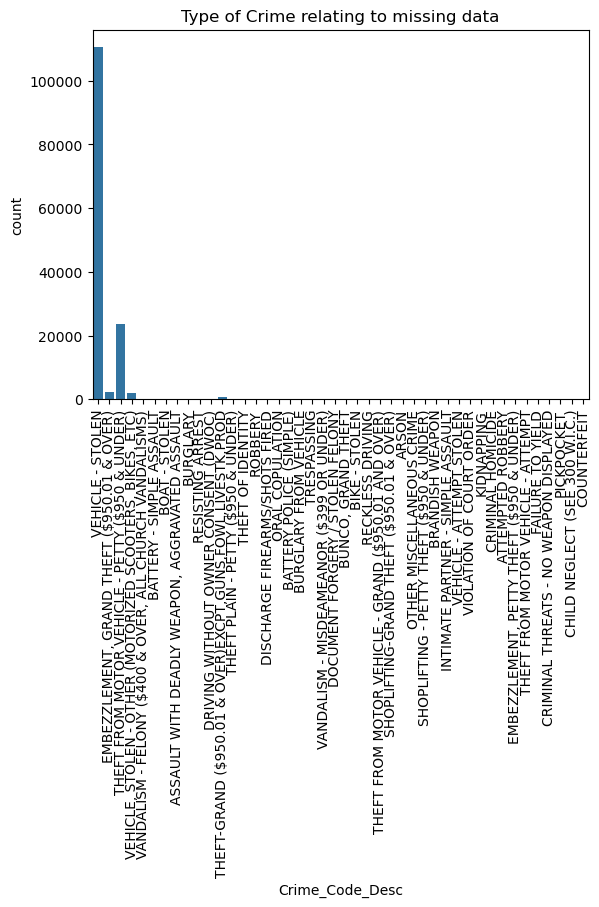

<Figure size 1200x600 with 0 Axes>

In [19]:
sns.countplot(x='Crime_Code_Desc', data=missing_data_sex)
plt.title('Type of Crime relating to missing data')
plt.xticks(rotation=90)
plt.figure(figsize=(12,6))
plt.show()
plt.close()

In [20]:
crime.head(10)

,DR_NO,Date_Reported,Date_Occurred,Time_Occurred,Area,Area_Name,Report_Distruct_Number,Part 1-2,Crime_Code,Crime_Code_Desc,Mocodes,Victim_Age,Victim_Sex,Victim_Descent,Premis_Code,Premis_Desc,Weapon_Used_Code,Weapon_Desc,Status,Status_Desc,Crime_Code_1,Crime_Code_2,Crime_Code_3,Crime_Code_4,Location,Cross_Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
5,231808869,04/04/2023 12:00:00 AM,12/01/2020 12:00:00 AM,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,1822 0100 0930 0929,41,M,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,9900 COMPTON AV,NaN,33.9467,-118.2463
6,230110144,04/04/2023 12:00:00 AM,07/03/2020 12:00:00 AM,900,1,Central,182,2,354,THEFT OF IDENTITY,0930 0929,25,M,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,1100 S GRAND AV,NaN,34.0415,-118.2620
7,220314085,07/22/2022 12:00:00 AM,05/12/2020 12:00:00 AM,1110,3,Southwest,303,2,354,THEFT OF IDENTITY,0100,27,F,B,248.0,CELL PHONE STORE,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,2500 S SYCAMORE AV,NaN,34.0335,-118.3537
8,231309864,04/28/2023 12:00:00 AM,12/09/2020 12:00:00 AM,1400,13,Newton,1375,2,354,THEFT OF IDENTITY,0100,24,F,B,750.0,CYBERSPACE,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,1300 E 57TH ST,NaN,33.9911,-118.2521
9,211904005,12/31/2020 12:00:00 AM,12/31/2020 12:00:00 AM,1220,19,Mission,1974,2,624,BATTERY - SIMPLE ASSAULT,0416,26,M,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,624.0,NaN,NaN,NaN,9000 CEDROS AV,NaN,34.2336,-118.4535


In [21]:
crime.dtypes
crime.Date_Reported = pd.to_datetime(crime.Date_Reported, format= '%m/%d/%Y %I:%M:%S %p')
crime.Date_Occurred = pd.to_datetime(crime.Date_Occurred, format='%m/%d/%Y %I:%M:%S %p')
crime.Area_Name = crime.Area_Name.astype('string')
crime.Crime_Code_Desc = crime.Crime_Code_Desc.astype('string')
crime.dtypes

DR_NO                              int64
Date_Reported             datetime64[ns]
Date_Occurred             datetime64[ns]
Time_Occurred                      int64
Area                               int64
Area_Name                 string[python]
Report_Distruct_Number             int64
Part 1-2                           int64
Crime_Code                         int64
Crime_Code_Desc           string[python]
Mocodes                           object
Victim_Age                         int64
Victim_Sex                        object
Victim_Descent                    object
Premis_Code                      float64
Premis_Desc                       object
Weapon_Used_Code                 float64
Weapon_Desc                       object
Status                            object
Status_Desc                       object
Crime_Code_1                     float64
Crime_Code_2                     float64
Crime_Code_3                     float64
Crime_Code_4                     float64
Location        

In [23]:
Year = crime['Date_Reported'].dt.year
Month = crime['Date_Reported'].dt.month
crime.insert(2, 'Year_Reported', Year)
crime.insert(3, 'Month_Reported', Month)
crime.head(3)

,DR_NO,Date_Reported,Year_Reported,Month_Reported,Date_Occurred,Time_Occurred,Area,Area_Name,Report_Distruct_Number,Part 1-2,Crime_Code,Crime_Code_Desc,Mocodes,Victim_Age,Victim_Sex,Victim_Descent,Premis_Code,Premis_Desc,Weapon_Used_Code,Weapon_Desc,Status,Status_Desc,Crime_Code_1,Crime_Code_2,Crime_Code_3,Crime_Code_4,Location,Cross_Street,LAT,LON
0,190326475,2020-03-01,2020,3,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,2020-02-09,2020,2,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,2020-11-11,2020,11,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002


In [24]:
Year2 = crime['Date_Occurred'].dt.year
Month2 = crime['Date_Occurred'].dt.month
crime.insert(5, 'Year_Occurred', Year2)
crime.insert(6, 'Month_Occurred', Month2)
crime.head(3)

,DR_NO,Date_Reported,Year_Reported,Month_Reported,Date_Occurred,Year_Occurred,Month_Occurred,Time_Occurred,Area,Area_Name,Report_Distruct_Number,Part 1-2,Crime_Code,Crime_Code_Desc,Mocodes,Victim_Age,Victim_Sex,Victim_Descent,Premis_Code,Premis_Desc,Weapon_Used_Code,Weapon_Desc,Status,Status_Desc,Crime_Code_1,Crime_Code_2,Crime_Code_3,Crime_Code_4,Location,Cross_Street,LAT,LON
0,190326475,2020-03-01,2020,3,2020-03-01,2020,3,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,2020-02-09,2020,2,2020-02-08,2020,2,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,2020-11-11,2020,11,2020-11-04,2020,11,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002


In [25]:
crime.rename(columns={'Month_OCccurred':'Month_Occurred'}, inplace=True)
name_of_month = crime.apply(lambda row: 'January' if row['Month_Reported'] == 1 else 'February' if row['Month_Reported'] == 2 else 'March' if row['Month_Reported'] == 3 else 'April' if row['Month_Reported'] == 4 else 'May' if row['Month_Reported'] == 5 else 'June' if row['Month_Reported'] == 6 else 'July' if row['Month_Reported'] == 7 else 'August' if row['Month_Reported'] == 8 else 'September' if row['Month_Reported'] == 9 else 'October' if row['Month_Reported'] == 10 else 'November' if row['Month_Reported'] == 11 else 'December',axis=1)
crime.insert(4, 'Month_Reported_Name', name_of_month) 

In [26]:
name_of_month2 = crime.apply(lambda row: 'January' if row['Month_Occurred'] == 1 else 'February' if row['Month_Occurred'] == 2 else 'March' if row['Month_Occurred'] == 3 else 'April' if row['Month_Occurred'] == 4 else 'May' if row['Month_Occurred'] == 5 else 'June' if row['Month_Occurred'] == 6 else 'July' if row['Month_Occurred'] == 7 else 'August' if row['Month_Occurred'] == 8 else 'September' if row['Month_Occurred'] == 9 else 'October' if row['Month_Occurred'] == 10 else 'November' if row['Month_Occurred'] == 11 else 'December',axis=1) 
crime.insert(8, 'Month_Occurred_Name', name_of_month2) 

In [27]:
crime.head(3)

,DR_NO,Date_Reported,Year_Reported,Month_Reported,Month_Reported_Name,Date_Occurred,Year_Occurred,Month_Occurred,Month_Occurred_Name,Time_Occurred,Area,Area_Name,Report_Distruct_Number,Part 1-2,Crime_Code,Crime_Code_Desc,Mocodes,Victim_Age,Victim_Sex,Victim_Descent,Premis_Code,Premis_Desc,Weapon_Used_Code,Weapon_Desc,Status,Status_Desc,Crime_Code_1,Crime_Code_2,Crime_Code_3,Crime_Code_4,Location,Cross_Street,LAT,LON
0,190326475,2020-03-01,2020,3,March,2020-03-01,2020,3,March,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,2020-02-09,2020,2,February,2020-02-08,2020,2,February,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,2020-11-11,2020,11,November,2020-11-04,2020,11,November,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002


In [28]:
#The next part of this project will look at different stats of crime through each year

In [29]:
crime_2020 = crime[crime['Year_Occurred'] == 2020]
crime_2021 = crime[crime['Year_Occurred'] == 2021]
crime_2022 = crime[crime['Year_Occurred'] == 2022]
crime_2023 = crime[crime['Year_Occurred'] == 2023]
crime_2024 = crime[crime['Year_Occurred'] == 2024]

In [30]:
crime_2020_num_of_crimes = crime_2020.Crime_Code_Desc.value_counts().sum()
crime_2021_num_of_crimes = crime_2021.Crime_Code_Desc.value_counts().sum()
crime_2022_num_of_crimes = crime_2022.Crime_Code_Desc.value_counts().sum()
crime_2023_num_of_crimes = crime_2023.Crime_Code_Desc.value_counts().sum()
crime_2024_num_of_crimes = crime_2024.Crime_Code_Desc.value_counts().sum()
total_crime = crime.Crime_Code_Desc.value_counts().sum()
print('The number of crimes committed in 2020: ' +str(crime_2020_num_of_crimes))
print('The number of crimes committed in 2021: ' +str(crime_2021_num_of_crimes))
print('The number of crimes committed in 2022: ' +str(crime_2022_num_of_crimes))
print('The number of crimes committed in 2023: ' +str(crime_2023_num_of_crimes))
print('The number of crimes committed in 2024: ' +str(crime_2024_num_of_crimes))
print('The total number of crimes committed: ' +str(total_crime))

The number of crimes committed in 2020: 285290
The number of crimes committed in 2021: 114711
The number of crimes committed in 2022: 235204
The number of crimes committed in 2023: 232269
The number of crimes committed in 2024: 116571
The total number of crimes committed: 984045


In [31]:
crime_2020_proportion_of_crimes = crime_2020.Crime_Code_Desc.value_counts().sum() / total_crime
crime_2021_proportion_of_crimes = crime_2021.Crime_Code_Desc.value_counts().sum() / total_crime
crime_2022_proportion_of_crimes = crime_2022.Crime_Code_Desc.value_counts().sum() / total_crime
crime_2023_proportion_of_crimes = crime_2023.Crime_Code_Desc.value_counts().sum() / total_crime
crime_2024_proportion_of_crimes = crime_2024.Crime_Code_Desc.value_counts().sum() / total_crime
print('The proportion of crime each year is as follows: ')
print('2020: ' + str(crime_2020_proportion_of_crimes))
print('2021: ' + str(crime_2021_proportion_of_crimes))
print('2022: ' + str(crime_2022_proportion_of_crimes))
print('2023: ' + str(crime_2023_proportion_of_crimes))
print('2024: ' + str(crime_2024_proportion_of_crimes))

The proportion of crime each year is as follows: 
2020: 0.28991560345309414
2021: 0.11657088852643933
2022: 0.23901752460507394
2023: 0.23603493742664208
2024: 0.11846104598875051


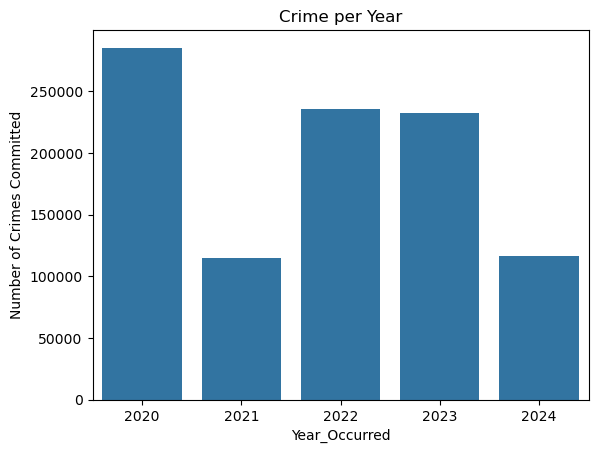

In [32]:
sns.countplot(x='Year_Occurred', data=crime)
plt.title('Crime per Year')
plt.ylabel('Number of Crimes Committed')
plt.show()
plt.close()

In [33]:
#Going to look more specifically at what time of year crimes are committed

In [34]:
crime['Month_Occurred_Name'] = pd.Categorical(crime['Month_Occurred_Name'], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
crime.Month_Occurred_Name.unique()

['March', 'February', 'November', 'August', 'December', ..., 'October', 'January', 'September', 'April', 'June']
Length: 12
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']

In [423]:
Crime_by_month = crime.groupby('Month_Occurred_Name', observed=False)['Crime_Code_Desc'].count().reset_index()
Crime_by_month


,Month_Occurred_Name,Crime_Code_Desc
0,January,92624
1,February,86506
2,March,87153
3,April,82964
4,May,82793
5,June,81530
6,July,83497
7,August,82953
8,September,79190
9,October,81414


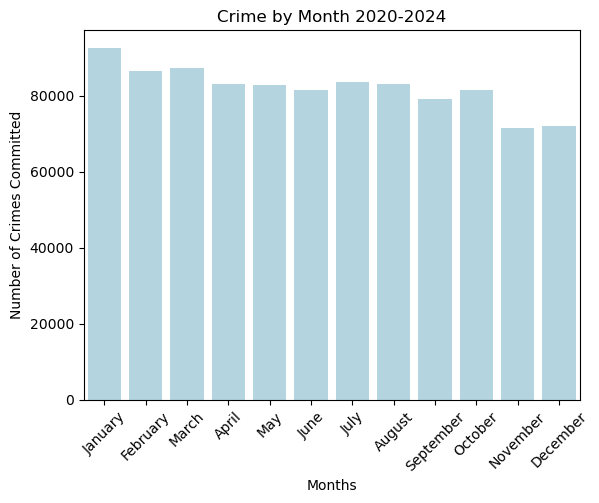

In [427]:
sns.barplot(x='Month_Occurred_Name', y='Crime_Code_Desc', data=Crime_by_month, color='lightblue')
plt.xlabel("Months")
plt.ylabel("Number of Crimes Committed")
plt.title("Crime by Month 2020-2024")
plt.xticks(rotation=45)
plt.show()
plt.close()

In [361]:
Months = Crime_by_month_pivoted.columns[:-1].tolist()
crime_2020_CPM = crime_2020.groupby('Month_Occurred_Name', observed=False)['Crime_Code_Desc'].count().reset_index()
value = round((crime_2020_CPM.Crime_Code_Desc / crime_2020_CPM.Crime_Code_Desc.sum()) * 100, 2)
crime_2020_CPM["Percentage"] = value
crime_2020_CPM

,Month_Occurred_Name,Crime_Code_Desc,Percentage
0,January,25795,9.04
1,February,23896,8.38
2,March,22500,7.89
3,April,21948,7.69
4,May,24379,8.55
5,June,24714,8.66
6,July,24758,8.68
7,August,24168,8.47
8,September,22415,7.86
9,October,23682,8.30


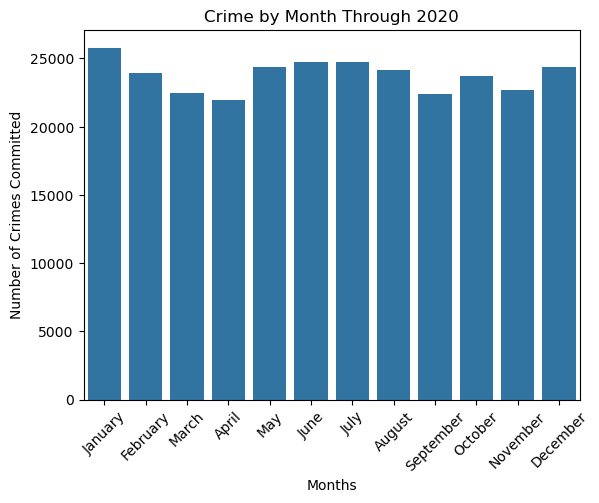

In [374]:
sns.barplot(x='Month_Occurred_Name', y='Crime_Code_Desc', data=crime_2020_CPM)
plt.xlabel("Months")
plt.ylabel("Number of Crimes Committed")
plt.title("Crime by Month Through 2020")
plt.xticks(rotation=45)
plt.show()
plt.close()

In [390]:
crime_2021_CPM = crime_2021.groupby('Month_Occurred_Name', observed=False)['Crime_Code_Desc'].count().reset_index()
crime_2021_CPM['Month_Occurred_Name'] = pd.Categorical(crime_2021_CPM['Month_Occurred_Name'], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
value = round((crime_2021_CPM.Crime_Code_Desc / crime_2021_CPM.Crime_Code_Desc.sum()) * 100, 2)
crime_2021_CPM["Percentage"] = value
crime_2021_CPM = crime_2021_CPM.sort_values(by='Month_Occurred_Name').reset_index()
crime_2021_CPM

,index,Month_Occurred_Name,Crime_Code_Desc,Percentage
0,4,January,9397,8.19
1,3,February,8995,7.84
2,7,March,9439,8.23
3,0,April,9327,8.13
4,8,May,9684,8.44
5,6,June,9728,8.48
6,5,July,10694,9.32
7,1,August,10340,9.01
8,11,September,9969,8.69
9,10,October,9917,8.65


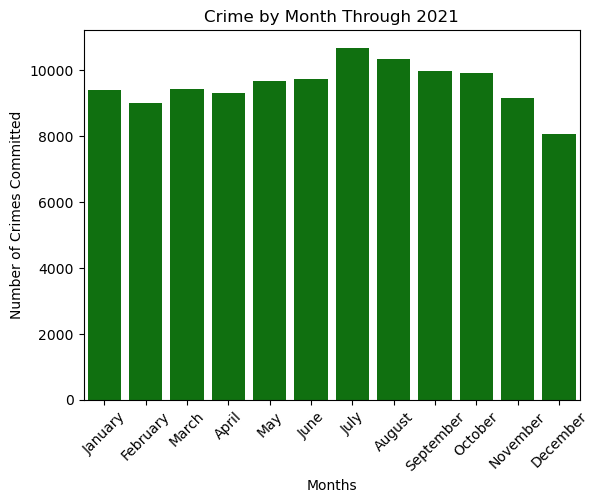

In [404]:
sns.barplot(x='Month_Occurred_Name', y='Crime_Code_Desc', data=crime_2021_CPM, color='green')
plt.xlabel("Months")
plt.ylabel("Number of Crimes Committed")
plt.title("Crime by Month Through 2021")
plt.xticks(rotation=45)
plt.show()
plt.close()

In [396]:
crime_2022_CPM = crime_2022.groupby('Month_Occurred_Name', observed=False)['Crime_Code_Desc'].count().reset_index()
crime_2022_CPM['Month_Occurred_Name'] = pd.Categorical(crime_2022_CPM['Month_Occurred_Name'], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
value = round((crime_2022_CPM.Crime_Code_Desc / crime_2022_CPM.Crime_Code_Desc.sum()) * 100, 2)
crime_2022_CPM["Percentage"] = value
crime_2022_CPM = crime_2022_CPM.sort_values(by='Month_Occurred_Name').reset_index()
crime_2022_CPM

,index,Month_Occurred_Name,Crime_Code_Desc,Percentage
0,4,January,18561,7.89
1,3,February,17750,7.55
2,7,March,19739,8.39
3,0,April,19833,8.43
4,8,May,20466,8.70
5,6,June,20270,8.62
6,5,July,20002,8.50
7,1,August,20140,8.56
8,11,September,19334,8.22
9,10,October,20329,8.64


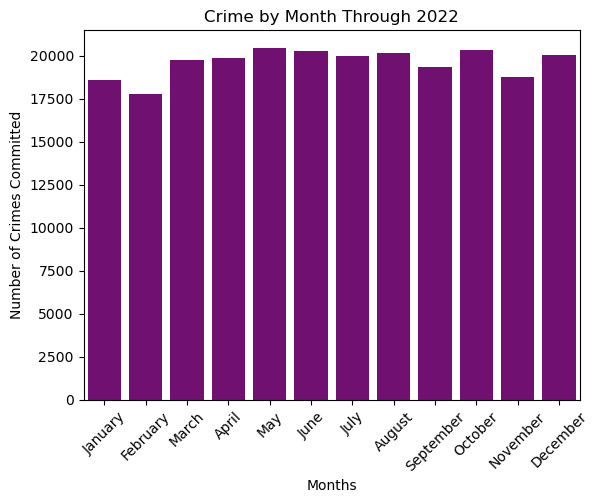

In [406]:
sns.barplot(x='Month_Occurred_Name', y='Crime_Code_Desc', data=crime_2022_CPM, color='purple')
plt.xlabel("Months")
plt.ylabel("Number of Crimes Committed")
plt.title("Crime by Month Through 2022")
plt.xticks(rotation=45)
plt.show()
plt.close()

In [408]:
crime_2023_CPM = crime_2023.groupby('Month_Occurred_Name', observed=False)['Crime_Code_Desc'].count().reset_index()
crime_2023_CPM['Month_Occurred_Name'] = pd.Categorical(crime_2023_CPM['Month_Occurred_Name'], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
value = round((crime_2023_CPM.Crime_Code_Desc / crime_2023_CPM.Crime_Code_Desc.sum()) * 100, 2)
crime_2023_CPM["Percentage"] = value
crime_2023_CPM = crime_2023_CPM.sort_values(by='Month_Occurred_Name').reset_index()
crime_2023_CPM

,index,Month_Occurred_Name,Crime_Code_Desc,Percentage
0,4,January,19962,8.59
1,3,February,18486,7.96
2,7,March,19208,8.27
3,0,April,18933,8.15
4,8,May,18908,8.14
5,6,June,18732,8.06
6,5,July,19926,8.58
7,1,August,20077,8.64
8,11,September,19317,8.32
9,10,October,20117,8.66


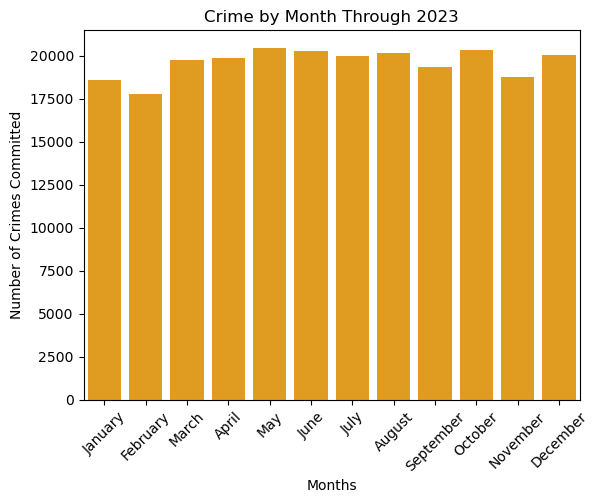

In [410]:
sns.barplot(x='Month_Occurred_Name', y='Crime_Code_Desc', data=crime_2022_CPM, color='orange')
plt.xlabel("Months")
plt.ylabel("Number of Crimes Committed")
plt.title("Crime by Month Through 2023")
plt.xticks(rotation=45)
plt.show()
plt.close()

In [431]:
crime_2024_CPM = crime_2024.groupby('Month_Occurred_Name', observed=False)['Crime_Code_Desc'].count().reset_index()
crime_2024_CPM['Month_Occurred_Name'] = pd.Categorical(crime_2024_CPM['Month_Occurred_Name'], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
value = round((crime_2024_CPM.Crime_Code_Desc / crime_2024_CPM.Crime_Code_Desc.sum()) * 100, 2)
crime_2024_CPM["Percentage"] = value
crime_2024_CPM = crime_2024_CPM.sort_values(by='Month_Occurred_Name').reset_index()
crime_2024_CPM

,index,Month_Occurred_Name,Crime_Code_Desc,Percentage
0,3,January,18909,16.22
1,2,February,17379,14.91
2,6,March,16267,13.95
3,0,April,12923,11.09
4,7,May,9356,8.03
5,5,June,8086,6.94
6,4,July,8117,6.96
7,1,August,8228,7.06
8,10,September,8155,7.00
9,9,October,7369,6.32


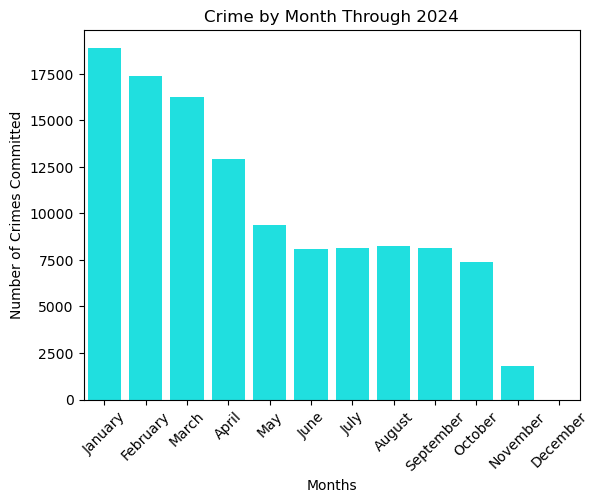

In [433]:
sns.barplot(x='Month_Occurred_Name', y='Crime_Code_Desc', data=crime_2024_CPM, color='cyan')
plt.xlabel("Months")
plt.ylabel("Number of Crimes Committed")
plt.title("Crime by Month Through 2024")
plt.xticks(rotation=45)
plt.show()
plt.close()

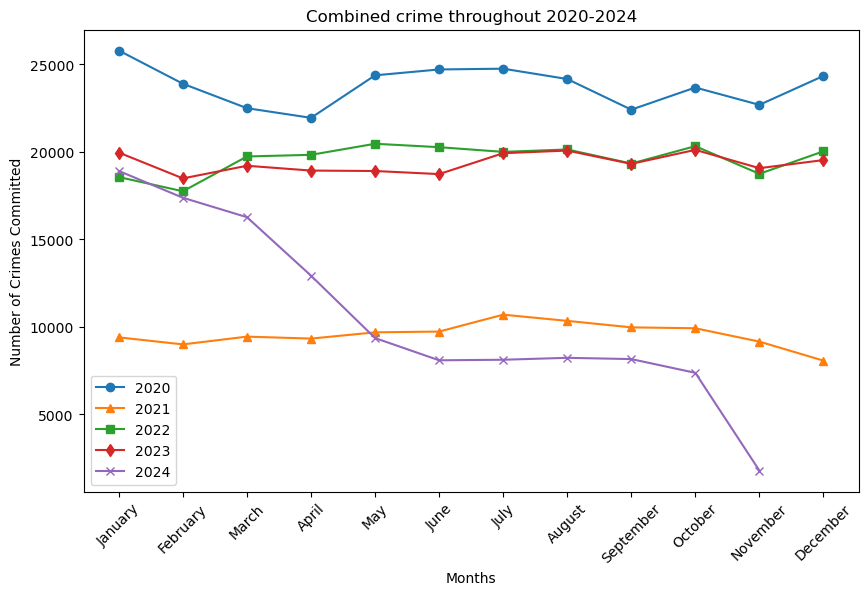

In [439]:
plt.figure(figsize=(10,6))
plt.plot(crime_2020_CPM['Month_Occurred_Name'], crime_2020_CPM['Crime_Code_Desc'], marker='o', label='2020')
plt.plot(crime_2021_CPM['Month_Occurred_Name'], crime_2021_CPM['Crime_Code_Desc'], marker='^', label='2021')
plt.plot(crime_2022_CPM['Month_Occurred_Name'], crime_2022_CPM['Crime_Code_Desc'], marker='s', label='2022')
plt.plot(crime_2023_CPM['Month_Occurred_Name'], crime_2023_CPM['Crime_Code_Desc'], marker='d', label='2023')
plt.plot(crime_2024_CPM['Month_Occurred_Name'], crime_2024_CPM['Crime_Code_Desc'], marker='x', label='2024')
plt.legend()
plt.title('Combined crime throughout 2020-2024')
plt.xlabel("Months")
plt.ylabel("Number of Crimes Committed")
plt.xticks(rotation=45)
plt.show()
plt.close()

In [519]:
crime2020_2023 = pd.concat([crime_2020_CPM, crime_2021_CPM, crime_2022_CPM, crime_2023_CPM]).reset_index(drop=True)
crime2020_2023
c2020_2023 = crime2020_2023.groupby('Month_Occurred_Name', observed=False)['Crime_Code_Desc'].sum().reset_index()
low_to_high_c2020_2023 = c2020_2023.sort_values(by='Crime_Code_Desc', ascending=True)
high_to_low_c2020_2023 =c2020_2023.sort_values(by='Crime_Code_Desc', ascending=False)
high_to_low_c2020_2023

,Month_Occurred_Name,Crime_Code_Desc
6,July,75380
7,August,74725
9,October,74045
0,January,73715
5,June,73444
4,May,73437
11,December,71977
8,September,71035
2,March,70886
3,April,70041


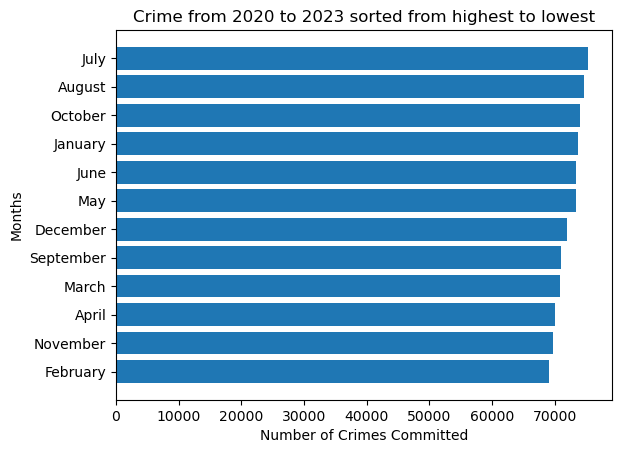

In [515]:
plt.barh(low_to_high_c2020_2023['Month_Occurred_Name'], low_to_high_c2020_2023['Crime_Code_Desc'])
plt.title("Crime from 2020 to 2023 sorted from highest to lowest")
plt.xlabel("Number of Crimes Committed")
plt.ylabel("Months")
plt.show()
plt.close()

In [47]:
#For the next and final part of this project, it will be looking at the crimes committed per age, gender and looking for trends within them

In [49]:
crime.head()

,DR_NO,Date_Reported,Year_Reported,Month_Reported,Month_Reported_Name,Date_Occurred,Year_Occurred,Month_Occurred,Month_Occurred_Name,Time_Occurred,Area,Area_Name,Report_Distruct_Number,Part 1-2,Crime_Code,Crime_Code_Desc,Mocodes,Victim_Age,Victim_Sex,Victim_Descent,Premis_Code,Premis_Desc,Weapon_Used_Code,Weapon_Desc,Status,Status_Desc,Crime_Code_1,Crime_Code_2,Crime_Code_3,Crime_Code_4,Location,Cross_Street,LAT,LON
0,190326475,2020-03-01,2020,3,March,2020-03-01,2020,3,March,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,2020-02-09,2020,2,February,2020-02-08,2020,2,February,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,2020-11-11,2020,11,November,2020-11-04,2020,11,November,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,2023-05-10,2023,5,May,2020-03-10,2020,3,March,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,2022-08-18,2022,8,August,2020-08-17,2020,8,August,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [50]:
crime_unique_list = crime.Crime_Code_Desc.unique().tolist()
crime_unique_list

['VEHICLE - STOLEN',
 'BURGLARY FROM VEHICLE',
 'BIKE - STOLEN',
 'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)',
 'THEFT OF IDENTITY',
 'BATTERY - SIMPLE ASSAULT',
 'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH',
 'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)',
 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
 'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
 'CHILD ANNOYING (17YRS & UNDER)',
 'THEFT PLAIN - PETTY ($950 & UNDER)',
 'LEWD CONDUCT',
 'THEFT PLAIN - ATTEMPT',
 'BURGLARY',
 'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)',
 'BATTERY WITH SEXUAL CONTACT',
 'INTIMATE PARTNER - SIMPLE ASSAULT',
 'ROBBERY',
 'BUNCO, GRAND THEFT',
 'INTIMATE PARTNER - AGGRAVATED ASSAULT',
 'ORAL COPULATION',
 'UNAUTHORIZED COMPUTER ACCESS',
 'SEX,UNLAWFUL(INC MUTUAL CONSENT,

In [51]:
word_dict_freq = {}
join_words = ','.join(crime_unique_list)
split_words = join_words.split()

for word in split_words:
    if word not in word_dict_freq:
        word_dict_freq[word] = 1
    else:
        word_dict_freq[word] += 1

sorted_dict = sorted(word_dict_freq.items(),key=lambda item: item[1], reverse=True)
sorted_dict= dict(sorted_dict)
sorted_dict

{'-': 38,
 '&': 19,
 'OF': 9,
 'THEFT': 8,
 'PETTY': 8,
 '($950.01': 7,
 'GRAND': 7,
 '($950': 7,
 'FROM': 6,
 'TO': 5,
 'WITH': 5,
 'VEHICLE': 4,
 'OR': 4,
 'SIMPLE': 3,
 'AGGRAVATED': 3,
 'MOTOR': 3,
 'RESTRAINING': 3,
 '/': 3,
 'POLICE': 3,
 'EMPLOYEE': 3,
 'AT': 3,
 'A': 3,
 'COIN': 3,
 'MACHINE': 3,
 'OVER),THEFT': 2,
 'DEADLY': 2,
 'WEAPON': 2,
 'UNDER),CHILD': 2,
 'PLAIN': 2,
 'SEXUAL': 2,
 'PARTNER': 2,
 'PENETRATION': 2,
 'STOLEN': 2,
 'ABUSE': 2,
 '(PHYSICAL)': 2,
 'CARDS,': 2,
 'FRAUD': 2,
 'USE': 2,
 'TRAFFICKING': 2,
 'ACTS': 2,
 'ATTEMPT': 2,
 'ORDER': 2,
 '(FIREARMS': 2,
 'VEHICLE,': 2,
 'ON': 2,
 'FIRED': 2,
 'INNKEEPER/THEFT': 2,
 'SERVICES,': 2,
 'MOVING': 2,
 'TAP': 2,
 'WORTHLESS': 2,
 'AUTO': 2,
 'ATTEMPTED': 2,
 'STOLEN,BURGLARY': 1,
 'VEHICLE,BIKE': 1,
 'STOLEN,SHOPLIFTING-GRAND': 1,
 'IDENTITY,BATTERY': 1,
 'ASSAULT,SODOMY/SEXUAL': 1,
 'CONTACT': 1,
 'B/W': 1,
 'PENIS': 1,
 'ONE': 1,
 'PERS': 1,
 'ANUS': 1,
 'OTH,CRM': 1,
 'AGNST': 1,
 'CHLD': 1,
 '(13': 1,
 'UN

In [52]:
list_of_key_words = list(sorted_dict.keys())
list_of_key_words
avoid = '-&/$'
words_only = []
for element in list_of_key_words:
    if element in avoid:
        pass
    elif element == '$':
        pass
    else:
        words_only.append(element)
        
sorted_WO = sorted(words_only)
sorted_WO

['$950',
 '$950.01,BATTERY',
 '($200',
 '($200.01',
 '($399',
 '($400',
 '($950',
 '($950.01',
 '(13',
 '(14-15',
 '(17YRS',
 '(DWOC),REPLICA',
 '(FIREARMS',
 '(MOTORIZED',
 '(PHYSICAL)',
 '(SEE',
 '(SEXUAL',
 '(SIMPLE),VEHICLE,',
 '10',
 '300',
 'A',
 'ABANDONMENT,THEFT,',
 'ABUSE',
 'ACCESS,SEX,UNLAWFUL(INC',
 'ACTS',
 'ACTS,VEHICLE',
 'AGAINST',
 'AGGRAVATED',
 'AGNST',
 'AIRCRAFT,TILL',
 'ALL',
 'AND',
 'ANIM,FIREARMS',
 'ANIMALS,BOAT',
 'ANNOYING',
 'ANUS',
 'ARREST,BURGLARY',
 'ASSAULT,ATTEMPTED',
 'ASSAULT,CREDIT',
 'ASSAULT,LETTERS,',
 'ASSAULT,ORAL',
 'ASSAULT,PICKPOCKET,DISTURBING',
 'ASSAULT,ROBBERY,BUNCO,',
 'ASSAULT,SODOMY/SEXUAL',
 'ASSLT',
 'AT',
 'ATTEMPT',
 'ATTEMPT,BURGLARY,THEFT',
 'ATTEMPT,COUNTERFEIT,DEFRAUDING',
 'ATTEMPT,DISHONEST',
 'ATTEMPT,FAILURE',
 'ATTEMPT,HUMAN',
 'ATTEMPT,LYNCHING',
 'ATTEMPT,SHOTS',
 'ATTEMPT,TELEPHONE',
 'ATTEMPT,TILL',
 'ATTEMPTED',
 'ATTEMPTED,BIKE',
 'ATTEMPTED,DISCHARGE',
 'ATTEMPTED,RAPE,',
 'ATTEMPTED,THEFT,',
 'AUTO',
 'B/W',
 'B

In [53]:
theft = ["Theft", "Shoplifting", "Pickpocket", "Burglary", "Robbery", "Purse Snatching", "Stolen", "Till Tap", "DWOC"]

assault = ["Battery", "Assault", "Manslaughter"]

sexual_crimes = ["Rape", "Sexual Assault", "Human Trafficking", "Indecent Exposure", "Lewd Conduct", "Oral Copulation", "Incest", "Sexual Contact", "Sex", "Sexual Penetration", "Pimping", "Pandering"]

child_crimes = ["Child Abuse", "Child Neglect", "Child Annoying", "Child Stealing", "Child Abandonment", "CHLD", "Child", "Drugs, to a minor"]

fraud = ["Embezzlement", "Forgery", "Credit Card Fraud", "Counterfeit", "Bunco", "Extortion", "Bribery", "Fraud", "Document Worthless"]

vandalism = ["Property Damage", "Arson", "Illegal Dumping", "Vandalism", "Telephone Property - Damage", 'THROWING OBJECT AT MOVING VEHICLE']

harassment = ["Threats", "Stalking", "Lewd Calls", "Peeping", "Threatening Phone Calls", "Disturbing the Peace", "Lewd", "Prowler"]

weapons = ["Brandishing", "Illegal Possession", "Discharge Firearms", "Shots Fired", "Replica Firearms", "Weapons Possession", "Bombing", "Brandish Weapon"]

violations = ["Restraining Order", "Court Order", "Contempt", "Resisting Arrest", "False Police Report", "False Imprisonment", "Failure to Yield", "Firearms Emergency Protective Order"]

misc_crimes = ["Trespassing", "Kidnapping", "Homicide", "Drug Offenses", "Reckless Driving", "Prowling", "Conspiracy", "Bigamy", "Inciting Riot", "Miscellaneous", "Contributing", "Bomb Scare", "Lynching", "Cruelty to Animals", "Drugs to Minor", "Drunk Roll", "Disrupt School", "Blocking Door", "Failure to Disperse", "Train Wrecking", "inciting a riot"]

cyber_crimes = ["Unauthorized Access", "Identity Theft", "Unauthorized Computer Access"]

In [55]:
def categorize_crime(description):
    description_upper = description.upper()
    
    if any(word.upper() in description_upper for word in theft):
        return "THEFT"
    elif any(word.upper() in description_upper for word in assault):
        return "ASSAULT"
    elif any(word.upper() in description_upper for word in sexual_crimes):
        return "SEXUAL CRIMES"
    elif any(word.upper() in description_upper for word in child_crimes):
        return "CHILD CRIMES"
    elif any(word.upper() in description_upper for word in fraud):
        return "FRAUD"
    elif any(word.upper() in description_upper for word in vandalism):
        return "VANDALISM"
    elif any(word.upper() in description_upper for word in harassment):
        return "HARRASSMENT"
    elif any(word.upper() in description_upper for word in weapons):
        return "WEAPONS"
    elif any(word.upper() in description_upper for word in violations):
        return "VIOLATIONS"
    elif any(word.upper() in description_upper for word in misc_crimes):
        return "MISC CRIMES"
    elif any(word.upper() in description_upper for word in cyber_crimes):
        return "CYBER CRIMES"
    else:
        return "UNCATEGORISED"

crime['Crime_Category'] = crime['Crime_Code_Desc'].apply(categorize_crime)
crime.head()

,DR_NO,Date_Reported,Year_Reported,Month_Reported,Month_Reported_Name,Date_Occurred,Year_Occurred,Month_Occurred,Month_Occurred_Name,Time_Occurred,Area,Area_Name,Report_Distruct_Number,Part 1-2,Crime_Code,Crime_Code_Desc,Mocodes,Victim_Age,Victim_Sex,Victim_Descent,Premis_Code,Premis_Desc,Weapon_Used_Code,Weapon_Desc,Status,Status_Desc,Crime_Code_1,Crime_Code_2,Crime_Code_3,Crime_Code_4,Location,Cross_Street,LAT,LON,Crime_Category
0,190326475,2020-03-01,2020,3,March,2020-03-01,2020,3,March,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,THEFT
1,200106753,2020-02-09,2020,2,February,2020-02-08,2020,2,February,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628,THEFT
2,200320258,2020-11-11,2020,11,November,2020-11-04,2020,11,November,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002,THEFT
3,200907217,2023-05-10,2023,5,May,2020-03-10,2020,3,March,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,THEFT
4,220614831,2022-08-18,2022,8,August,2020-08-17,2020,8,August,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277,THEFT


In [56]:
crime.Crime_Code_Desc[crime.Crime_Category == 'UNCATEGORISED'].unique()

<StringArray>
[]
Length: 0, dtype: string

In [130]:
def Victim_age_group(age):
    if age in range(0,10):
        return "0-9"
    elif age in range(11,20):
        return "10-19"
    elif age in range(21,30):
        return "20-29"
    elif age in range(31,40):
        return "30-39"
    elif age in range(41,50):
        return "40-49"
    elif age in range(51,60):
        return "50-59"
    elif age in range(61,70):
        return "60-69"
    elif age in range(71,80):
        return "70-79"
    elif age in range(81,90):
        return "80-89"
    elif age in range(91,100):
        return "90-99"
    else:
        return "Unclassified"

crime["Victim_Age_Group"] = crime.Victim_Age.apply(Victim_age_group)
crime["Victim_Age_Group"] = pd.Categorical(crime["Victim_Age_Group"], ['Unclassified', '0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99'], ordered=True)

crime.Victim_Age_Group.unique()

['0-9', '40-49', '10-19', '20-29', '50-59', ..., 'Unclassified', '60-69', '70-79', '80-89', '90-99']
Length: 11
Categories (11, object): ['Unclassified' < '0-9' < '10-19' < '20-29' ... '60-69' < '70-79' < '80-89' < '90-99']

In [656]:
groupby_victims_and_crime = crime.groupby(['Victim_Age_Group','Victim_Age', 'Victim_Sex', 'Victim_Descent'], observed=True).Crime_Category.value_counts().reset_index()
print(groupby_victims_and_crime.Victim_Age_Group.value_counts())
groupby_victims_and_crime.head()

Victim_Age_Group
20-29           1621
30-39           1608
40-49           1464
50-59           1283
Unclassified    1130
60-69           1117
10-19            953
70-79            854
0-9              669
80-89            558
90-99            341
Name: count, dtype: int64


,Victim_Age_Group,Victim_Age,Victim_Sex,Victim_Descent,Crime_Category,count
0,Unclassified,-4,M,A,THEFT,2
1,Unclassified,-4,X,X,ASSAULT,2
2,Unclassified,-4,X,X,THEFT,2
3,Unclassified,-3,M,W,THEFT,4
4,Unclassified,-3,X,X,THEFT,6


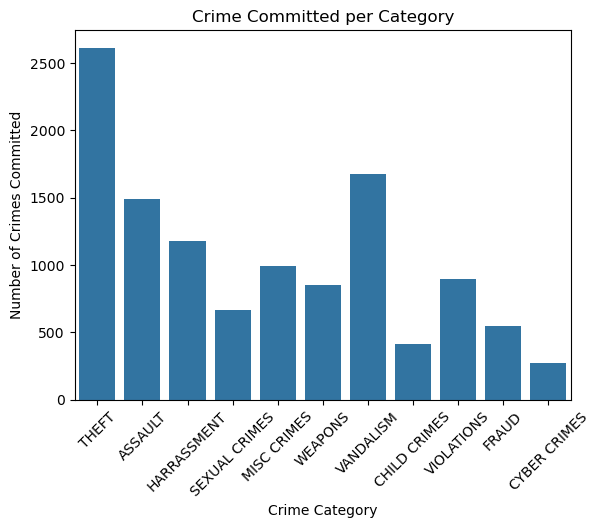

In [662]:
sns.countplot(x='Crime_Category', data=groupby_victims_and_crime)
plt.title('Crime Committed per Category')
plt.xlabel("Crime Category")
plt.ylabel("Number of Crimes Committed")
plt.xticks(rotation=45)
plt.show()
plt.close()

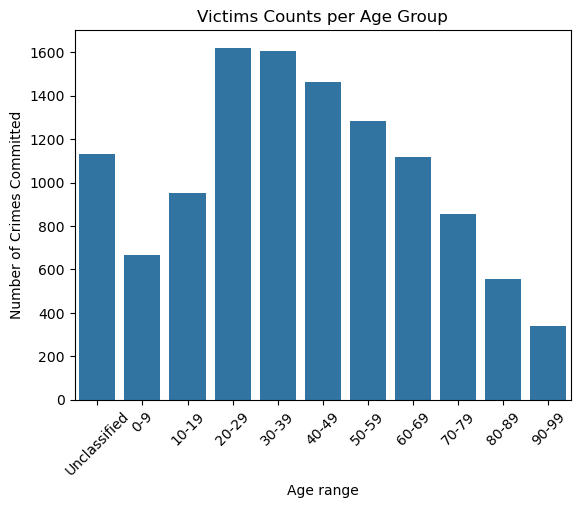

In [648]:
sns.countplot(x='Victim_Age_Group', data=groupby_victims_and_crime)
plt.title('Victims Counts per Age Group')
plt.xlabel("Age range")
plt.ylabel("Number of Crimes Committed")
plt.xticks(rotation=45)
plt.show()
plt.close()

In [624]:
pivot_by_agegroup_and_crime = groupby_victims_and_crime.pivot_table(columns='Victim_Age_Group',
                                                              index='Crime_Category',
                                                                values='count',
                                                                    aggfunc='count',
                                                                   observed=False)
pivot_by_agegroup_and_crime.head()

Victim_Age_Group,Unclassified,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99
Crime_Category,,,,,,,,,,,
ASSAULT,139,119,135,189,177,156,157,138,118,99,65
CHILD CRIMES,33,91,86,50,62,47,22,8,6,0,8
CYBER CRIMES,23,6,11,41,53,54,29,31,12,7,2
FRAUD,51,10,61,94,78,70,67,60,40,13,5
HARRASSMENT,114,57,106,173,175,148,124,106,89,53,31


In [ ]:
plt.barh(list_age_groups, Total_crime_per_age_group)
plt.show()

In [152]:
Total_crime_per_age_group = crime.Victim_Age_Group.value_counts()
print(Total_crime_per_age_group)


Victim_Age_Group
0-9             267114
30-39           168634
20-29           164188
40-49           111997
50-59            84394
Unclassified     75372
60-69            50298
10-19            35934
70-79            19415
80-89             5375
90-99             1324
Name: count, dtype: int64


['0-9',
 '40-49',
 '10-19',
 '20-29',
 '50-59',
 '30-39',
 'Unclassified',
 '60-69',
 '70-79',
 '80-89',
 '90-99']

In [611]:
pivot_by_sex_and_crime = groupby_victims_and_crime.pivot_table(columns='Victim_Sex',
                                                              index='Crime_Category',
                                                                values='count',
                                                                    aggfunc='count',
                                                                   observed=False)

pivot_by_sex_and_crime.rename(columns={'-':'U'}, inplace=True)
pivot_by_sex_and_crime = pivot_by_sex_and_crime.fillna(0)
pivot_by_sex_and_crime = pivot_by_sex_and_crime.map(lambda x: int(x) if isinstance(x, float) else x)
pivot_by_sex_and_crime['X'] = pivot_by_sex_and_crime.X + pivot_by_sex_and_crime.U
pivot_by_sex_and_crime.drop(columns="U", axis=1, inplace=True)
percentage = round((pivot_by_sex_and_crime.sum() / pivot_by_sex_and_crime.sum().sum()) * 100, 2)
print(f"The percentage of crime committed per gender category is as follows: \n Men: {percentage.iloc[2]}% \n Women: {percentage.iloc[0]}% \n Other: {percentage.iloc[1]}% \n Unclassified: {percentage.iloc[3]}%")

The percentage of crime committed per gender category is as follows: 
 Men: 45.72% 
 Women: 46.76% 
 Other: 0.69% 
 Unclassified: 6.83%


In [143]:
pivot_by_Descent_and_crime = groupby_victims_and_crime.pivot_table(columns='Victim_Descent',
                                                              index='Crime_Category',
                                                                values='count',
                                                                    aggfunc='count',
                                                                   observed=False)
pivot_by_Descent_and_crime.rename(columns={'-':'-'}, inplace=True)
pivot_by_Descent_and_crime = pivot_by_Descent_and_crime.fillna(0)
pivot_by_Descent_and_crime = pivot_by_Descent_and_crime.map(lambda x: int(x) if isinstance(x, float) else x)
pivot_by_Descent_and_crime.X = pivot_by_Descent_and_crime.X + pivot_by_Descent_and_crime['-']
pivot_by_Descent_and_crime.drop('-', axis=1, inplace=True)
pivot_by_Descent_and_crime

#Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican 
#I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian 
#O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

Victim_Descent,A,B,C,D,F,G,H,I,J,K,L,O,P,S,U,V,W,X,Z
Crime_Category,,,,,,,,,,,,,,,,,,,
ASSAULT,23,31,9,1,18,8,33,10,4,20,0,27,4,3,6,7,29,30,5
CHILD CRIMES,8,18,0,0,2,0,18,2,1,1,0,15,2,0,1,1,17,10,0
CYBER CRIMES,10,14,0,0,1,0,17,1,0,1,0,14,0,0,0,0,22,7,0
FRAUD,15,19,2,0,1,1,22,1,0,4,0,17,1,0,1,0,22,12,2
HARRASSMENT,21,25,15,1,16,3,26,13,12,17,1,25,7,1,2,6,26,28,10
MISC CRIMES,22,23,3,0,8,0,23,4,2,10,0,23,2,1,1,3,22,29,0
SEXUAL CRIMES,17,20,2,0,2,1,23,2,0,5,0,19,1,0,0,1,21,17,0
THEFT,27,32,26,12,35,12,37,22,23,26,12,31,18,14,18,20,35,35,19
VANDALISM,22,28,18,5,23,6,28,13,17,19,9,28,10,2,13,13,28,31,10
